<a href="https://colab.research.google.com/github/yxrellx/practicaredNeuronal/blob/main/Kfolds_Reconocimiento_de_imagenes_Red_Neuronal_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
#Carga de librerias
from PIL import Image
import os
import numpy as np
from keras.models import load_model

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Superheroes2'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Cargar el modelo
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'batman' in filename:
      y.append(0) #indice 0 batman
    elif 'ironman' in filename: #indice 1 ironman
      y.append(1)
    elif 'linternaverde' in filename: #indice 2 linternaverde
      y.append(2)
    elif 'spiderman' in filename: #indice 3 spiderman
      y.append(3)
    elif 'wolwerine' in filename: #indice 4 wolwerine
      y.append(4)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [137]:
type(image_list)

list

In [138]:
type(image_list[0])

numpy.ndarray

In [139]:
image_list[0]

array([[[0.49019608, 0.52156863, 0.52941176],
        [0.49803922, 0.50980392, 0.51764706],
        [0.48235294, 0.49411765, 0.49411765],
        ...,
        [0.92156863, 0.84705882, 0.08627451],
        [0.91764706, 0.83921569, 0.08627451],
        [0.89803922, 0.79607843, 0.09019608]],

       [[0.54509804, 0.58039216, 0.59215686],
        [0.54117647, 0.57647059, 0.58431373],
        [0.5372549 , 0.55686275, 0.56862745],
        ...,
        [0.9254902 , 0.84313725, 0.09411765],
        [0.90588235, 0.81960784, 0.10196078],
        [0.8745098 , 0.76470588, 0.10980392]],

       [[0.6       , 0.62352941, 0.65098039],
        [0.58431373, 0.62352941, 0.63921569],
        [0.56078431, 0.60784314, 0.61176471],
        ...,
        [0.93333333, 0.84705882, 0.08627451],
        [0.90980392, 0.81176471, 0.09411765],
        [0.84313725, 0.74901961, 0.09411765]],

       ...,

       [[0.00784314, 0.        , 0.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01960784, 0

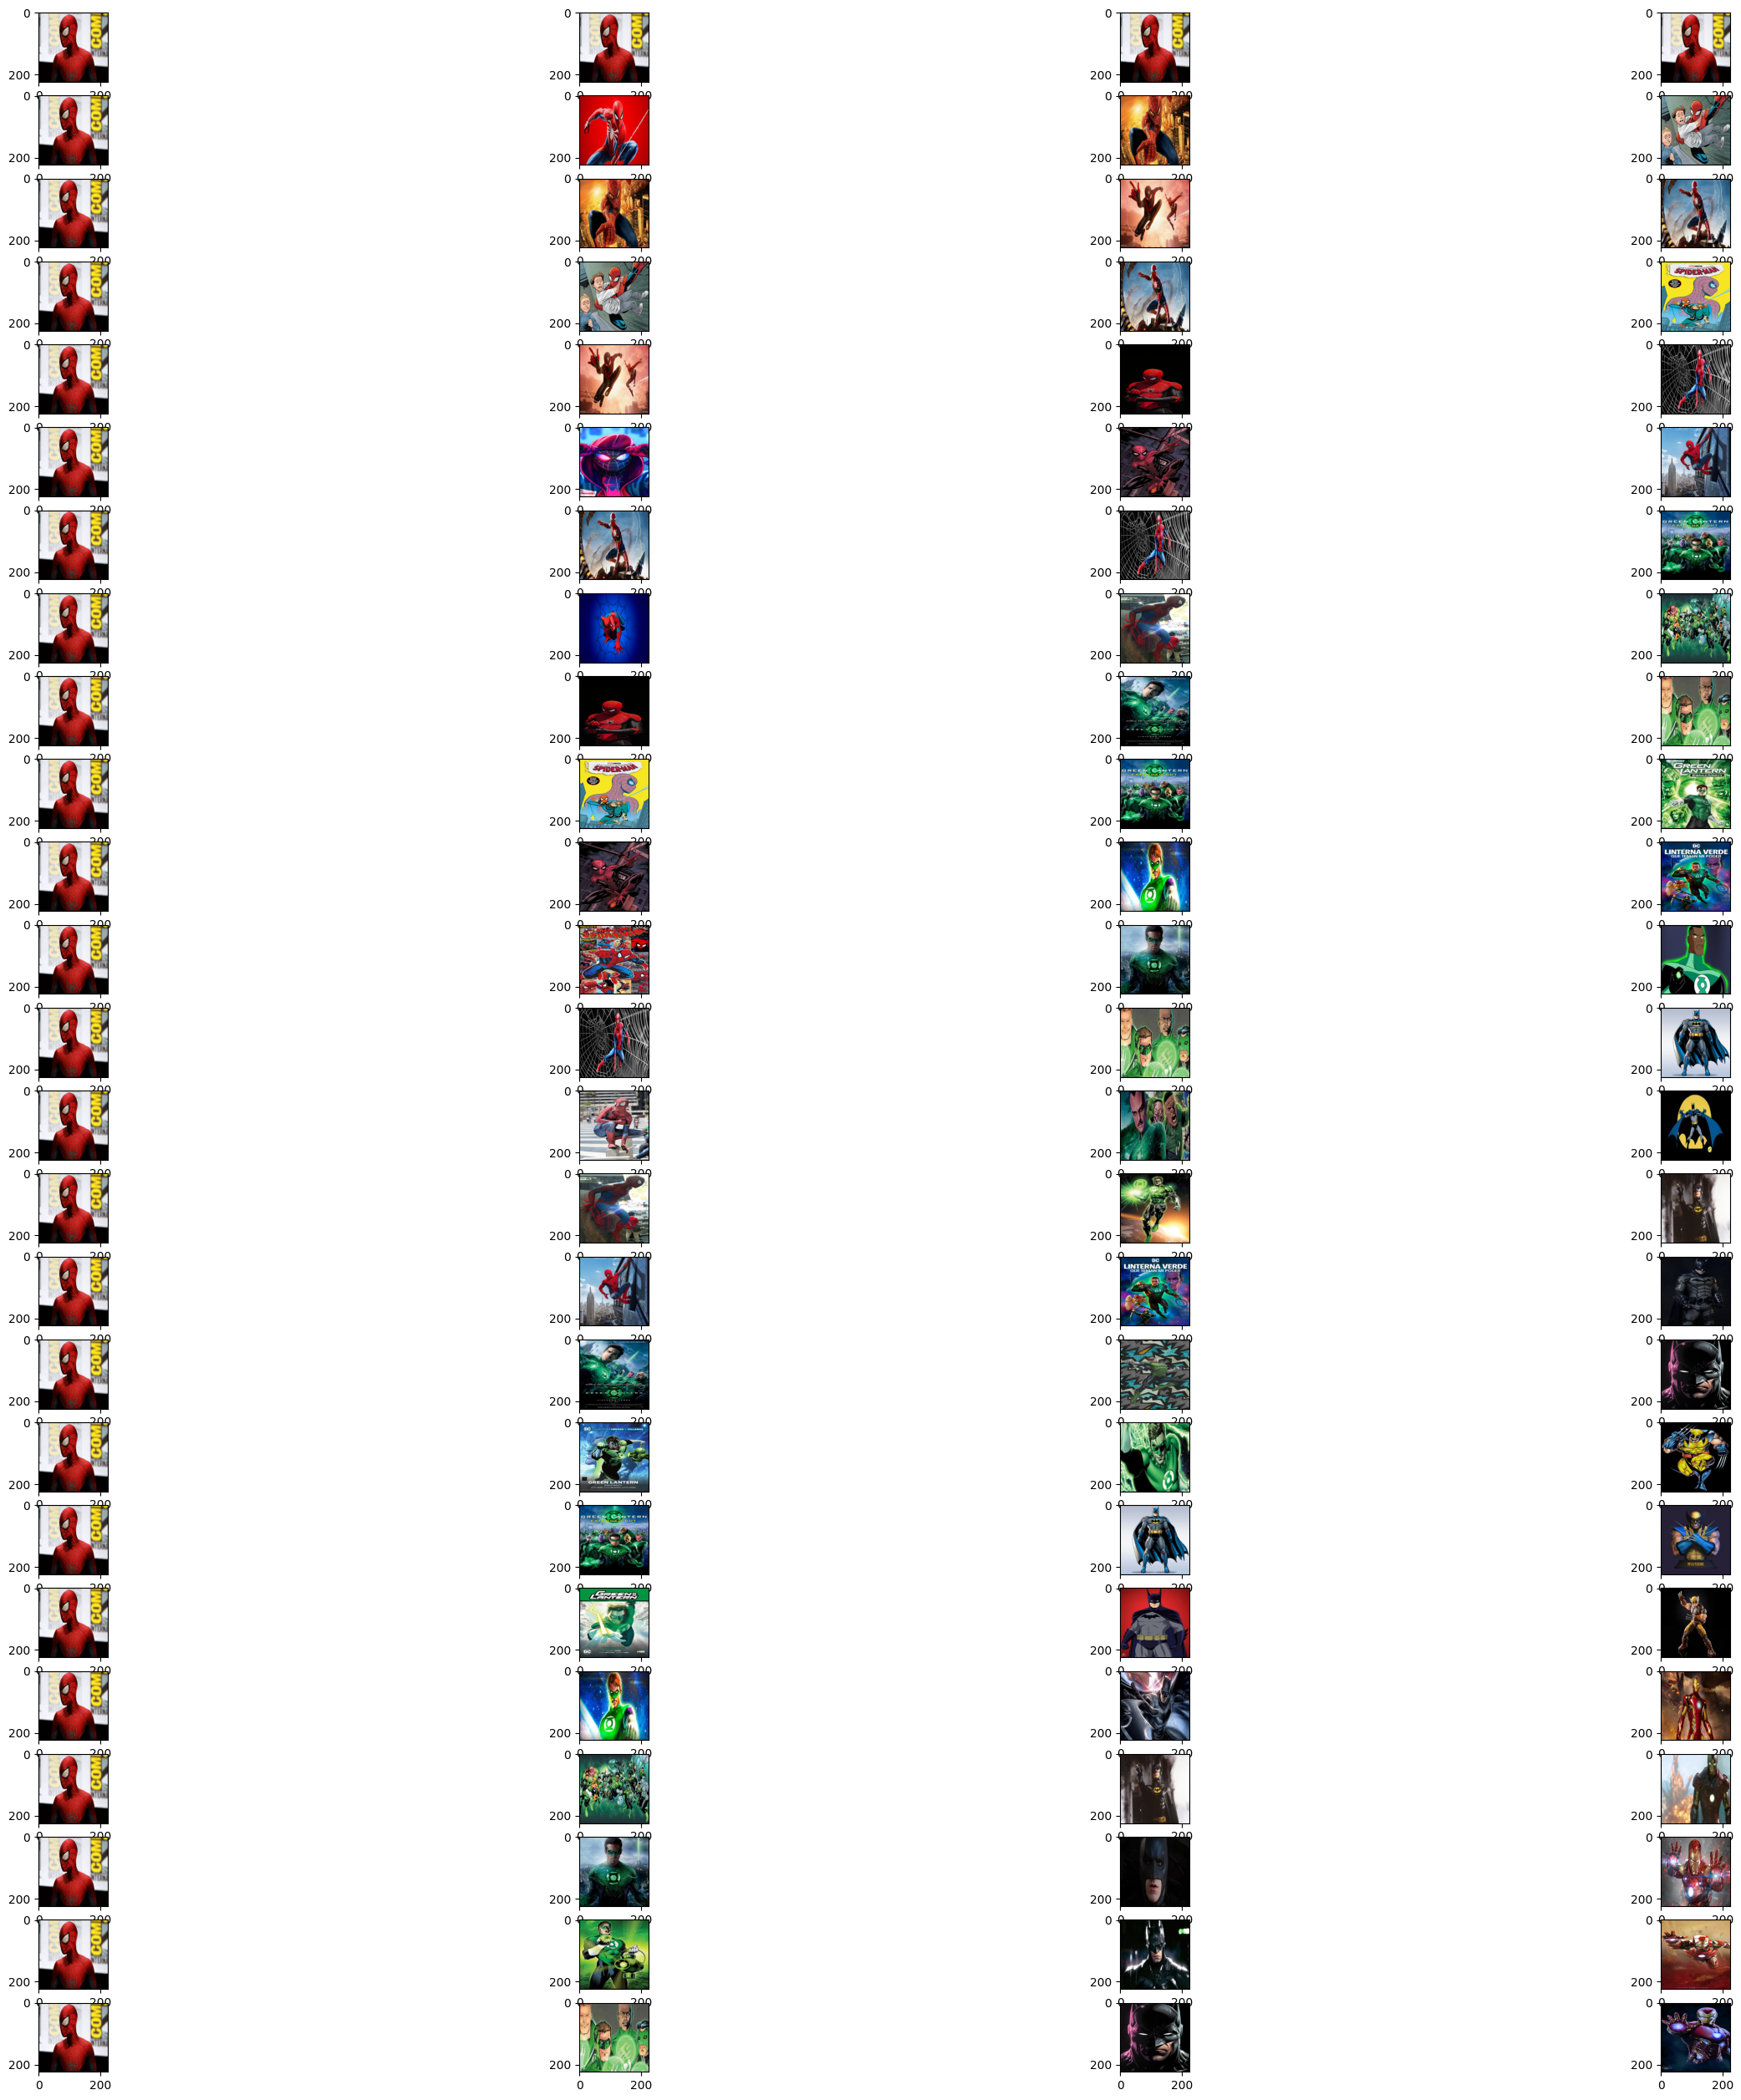

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
import matplotlib.pyplot as plt
nImagenes = len(image_list)
filas = nImagenes // 4
fig, axes = plt.subplots(filas,4, figsize=(32,32))
for f in range(filas):
  for c in range(4):
    axes[f,c].imshow(image_list[f*c])

#axes[0,0].imshow(image_list_train[0])
#for i,ax in enumerate(image_list_train):
#    ax.imshow(image_list_train[i].flat)
#imgplot = plt.imshow(img)
#plt.show()

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
y_test

[2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2]

In [143]:
y_train

[4,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 0,
 0,
 2,
 4,
 3,
 0,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 3,
 0,
 1,
 1,
 4,
 1,
 0,
 3,
 0,
 2,
 4,
 4,
 3,
 3,
 2,
 1,
 4,
 2,
 0,
 0,
 3,
 2,
 4,
 3,
 1,
 1,
 2,
 2,
 4,
 2,
 1,
 1,
 3,
 2,
 4,
 2,
 0,
 4,
 4,
 0,
 1,
 2,
 0,
 2,
 4,
 2,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 2,
 0,
 1]

In [144]:

#Carga de librerias
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten
from  keras.regularizers import l2
keras.utils.set_random_seed(812)
np.random.seed(812)
model = models.Sequential()
tam_kernel1 = (3,3)
model.add(layers.Conv2D(128, tam_kernel1, activation='relu', input_shape=(224, 224, 3)))
tam_pooling1 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling1))
tam_kernel2 = (3,3)
model.add(layers.Conv2D(64, tam_kernel2, activation='relu', kernel_regularizer=l2(0.002)))
tam_pooling2 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling2))
tam_kernel3 = (3,3)
model.add(layers.Conv2D(64, tam_kernel3, activation='relu', kernel_regularizer=l2(0.002)))
#tam_pooling3 = (2,2)
#model.add(layers.MaxPooling2D(tam_pooling3))
#tam_kernel4 = (3,3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
def crear_modelo():
  #keras.utils.set_random_seed(20)#812
  #Se establece un modelo neuronal
  model = Sequential()
  model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
  model.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.002)))
  model.add(Dense(64, activation='relu',  kernel_regularizer=l2(0.002)))
  model.add(Dense(5, activation='softmax')) #3 es el numero de clases
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [146]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [148]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [149]:
X_train.shape

(80, 224, 224, 3)

In [150]:
#Verificamos el cambio
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [151]:
type(y_train)

numpy.ndarray

In [152]:
y_train.shape

(80, 5)

In [153]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
# Configurar la validación cruzada con K-Fold


checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

kf = KFold(n_splits=5, shuffle=True, random_state=52)
fold_no = 1
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = crear_modelo()

    # Entrenar el modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint])

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(accuracy)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}")
    fold_no += 1

# Evaluar el modelo en el conjunto de prueba
#test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"Mean Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Accuracy: 0.5000
Fold 2 - Accuracy: 0.2500
Fold 3 - Accuracy: 0.1875
Fold 4 - Accuracy: 0.2500
Fold 5 - Accuracy: 0.3125
Mean Cross-Validation Accuracy: 0.3000


In [154]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [155]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [156]:
print(y_test.shape)
print(X_test.shape)

(20,)
(20, 224, 224, 3)


In [157]:
#Verificamos su forma
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [158]:
model.load_weights('best_model.keras')

In [159]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [160]:
#Revisamos el resultado
y_pred

array([[3.31277647e-07, 1.22146998e-02, 4.69347179e-01, 1.90421000e-01,
        3.28016698e-01],
       [6.04539454e-01, 1.95063800e-01, 4.08503506e-03, 1.94572657e-01,
        1.73907960e-03],
       [5.85264979e-06, 4.45474029e-01, 1.84845570e-02, 5.34413874e-01,
        1.62174099e-03],
       [1.13346986e-01, 3.64026129e-01, 5.09537058e-05, 6.03540242e-02,
        4.62221771e-01],
       [2.40988549e-04, 7.14808047e-01, 2.58112606e-02, 2.54391581e-01,
        4.74795839e-03],
       [5.51741151e-03, 5.95239520e-01, 1.25089228e-01, 2.51780331e-01,
        2.23734304e-02],
       [1.46444617e-02, 9.12055330e-05, 1.16675124e-02, 8.34179997e-01,
        1.39416888e-01],
       [2.65677413e-03, 4.00143396e-03, 1.07547803e-05, 9.89844263e-01,
        3.48674622e-03],
       [1.73651415e-07, 2.77859112e-03, 3.43873799e-01, 5.39840152e-03,
        6.47949040e-01],
       [5.07217944e-02, 4.03259275e-03, 1.14411837e-03, 9.39643264e-01,
        4.45830403e-03],
       [4.48911190e-02, 7.6969

In [161]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [162]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.4
Precisión por clase: [0.5        0.22222222 1.         0.25       1.        ] -> 0.5944444444444444
Sensibilidad por clase: [0.5  0.5  0.25 0.25 0.5 ] -> 0.4
F1 Score por clase: [0.5        0.30769231 0.4        0.25       0.66666667] -> 0.4248717948717949


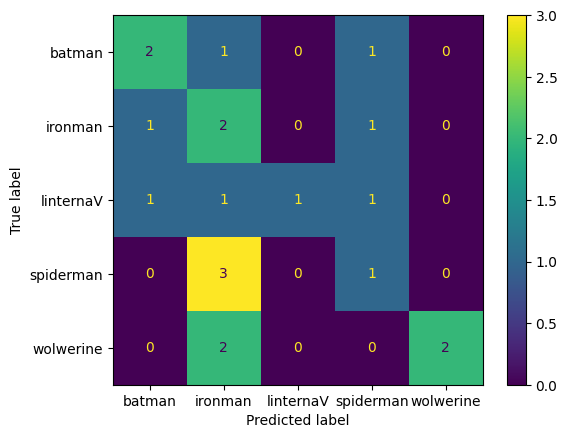

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels =['batman','ironman','linternaV','spiderman','wolwerine']
disp.plot()

In [164]:
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [165]:
y_pred

array([0, 0, 3, 0, 1, 1, 3, 3, 4, 3, 1, 1, 1, 1, 4, 1, 1, 0, 1, 2])

In [166]:
X_test[5]

array([[[0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235]],

       [[0.12941176, 0.11372549, 0.10980392],
        [0.12941176, 0.11372549, 0.10980392],
        [0.12941176, 0.11372549, 0.10980392],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235]],

       [[0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.12941176, 0.11372549, 0.10980392],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.12156863, 0.10588235, 0.10196078],
        [0.1254902 , 0.10980392, 0.10588235]],

       ...,

       [[0.36078431, 0.30196078, 0.2745098 ],
        [0.35686275, 0.29803922, 0.27058824],
        [0.36470588, 0

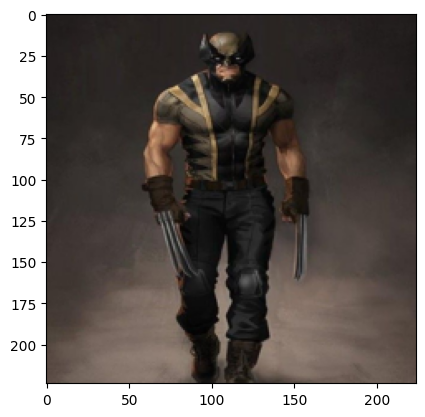

In [167]:
import matplotlib.pyplot as plt
img_array = (X_test[5] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)

In [168]:
model.save('modelo_kfold.h5')